<p><h2><b><font color = 'Blue'> MNIST Case Study </font></b></h2></p>

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

<img src = 'https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/MNIST.png'>

In [0]:
%tensorflow_version 2.x
from tensorflow import keras

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.1.0-rc1'

In [0]:
keras.__version__

'2.2.4-tf'

<p><h3><b><font color = 'DarkBlue'> Loading the MNIST dataset in Keras </font></b></h3></p>

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy
arrays.

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


<p><b>train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.</b></p>

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
train_labels.shape

(60000,)

<p><h3><font color= 'DarkBlue'><b> Visualizing first four samples in Train dataset </b></font></h3></p>




In [0]:
import matplotlib.pyplot as plt
train_images[0,:,:].shape

(28, 28)

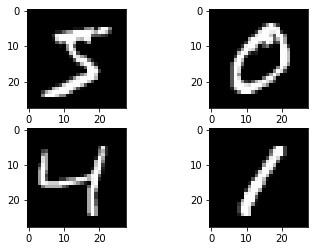

In [0]:
plt.subplot(2,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(train_images[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(train_images[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(train_images[3], cmap='gray');

<p><h3><b><font color = 'DarkBlue'> Preparing the image data </font></b></h3></p>

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images.ndim

3

In [0]:
#train_images[10:20,10:20,10:20]

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

In [0]:
train_images.ndim

2

In [0]:
train_images.shape

(60000, 784)

In [0]:
#train_images[:20,100:120]

In [0]:
#train_images[15000:15100,300:400]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.81960785],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.04313726,
        0.60784316],
       [0.6117647 , 0.        , 0.        , ..., 0.9882353 , 0.99607843,
        0.6784314 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

<p><h3><b><font color = 'DarkBlue'> Preparing the labels </font></b></h3></p>

the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We use to_categorical() to encode the labels.

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
train_labels.shape

(60000, 10)

<p><h3><b><font color = 'DarkBlue'> Network Architecture </font></b></h3></p>

# ***1. Building a Sequential Model ***
  We can create a deep learning sequential model with two layers. 
  





In [0]:
from keras import models
from keras import layers

In [0]:
network = keras.models.Sequential()

<p> We are creating a simple model with one hidden layer with 300 number of neurons. A rectifier activation function is used for the neurons in the hidden layer. 
A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction.`

In [0]:
network.add(keras.layers.Dense(300, activation='relu', input_shape=(784,)))


In [0]:
300*784 +300

235500

In [0]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
Total params: 235,500
Trainable params: 235,500
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
len(network.layers)

2

In [0]:
#network.pop()   # to remove last layer from the model use pop()

In [0]:
weights = network.get_weights()

In [0]:
type(weights)

list

In [0]:
weights[0].shape,weights[1].shape,weights[2].shape,weights[3].shape

((784, 300), (300,), (300, 10), (10,))

In [0]:
weights[2]

array([[ 0.03699031, -0.00067908, -0.09343989, ...,  0.01335266,
         0.07738909,  0.09407765],
       [ 0.04086448,  0.03286828, -0.04915332, ...,  0.07271297,
        -0.10895771,  0.12700887],
       [-0.10736863, -0.0886289 , -0.02526411, ..., -0.02836102,
        -0.07754068, -0.05127267],
       ...,
       [ 0.07911496,  0.00167882,  0.01791939, ..., -0.03290244,
        -0.08454916,  0.09989917],
       [ 0.13062991,  0.00397831,  0.05824725, ..., -0.11562003,
        -0.04297085,  0.07701236],
       [ 0.08507085, -0.11061769, -0.11349399, ..., -0.01838651,
        -0.07814558,  0.07826689]], dtype=float32)

In [0]:
weights[2]

array([[ 0.01303679,  0.09409097,  0.02146462, ...,  0.03231071,
         0.10561524,  0.10049395],
       [-0.13220516, -0.09818897, -0.08962873, ...,  0.1248983 ,
        -0.10244682,  0.00749806],
       [ 0.09939705, -0.09146242,  0.09516993, ..., -0.03407766,
         0.07624479, -0.08710362],
       ...,
       [-0.03386296,  0.0595866 ,  0.10254885, ..., -0.12324838,
        -0.02064719, -0.10208419],
       [ 0.06767523,  0.11830296,  0.01861836, ..., -0.10152847,
         0.03268035,  0.05393805],
       [-0.13080479, -0.10186736, -0.10100516, ..., -0.07089841,
         0.13436367, -0.00309207]], dtype=float32)

In [0]:
keras.backend.clear_session()

<p><h3><b><font color = 'DarkBlue'> Compilation Step</font></b></h3></p>

We will call compile() to specify the loss function. As our targets are one-hot vectors we would use 'categorical_crossentropy' loss function. 

The optimizer we are using is simple Stochastic Gradient Descent 'sgd' which is used to learn the weights. 

As this is a classifier model we use 'accuracy' as the metrics for evaluation. 

In [0]:
network.compile(optimizer= keras.optimizers.SGD(learning_rate=0.01),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
network.compile(optimizer= 'SGD',
loss='categorical_crossentropy',
metrics=['accuracy'])

<p><h3><b><font color = 'DarkBlue'> Fit the model with train data  </font></b></h3></p>

We call fit() to train out model.

It takes input features(train_images) and the target classes (train_labels) as well as the number of epochs to train. 

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. 




In [0]:
60000/512

117.1875

In [0]:
test_images.shape,train_images.shape

((10000, 784), (60000, 784))

In [0]:
history = network.fit(train_images, train_labels,epochs=10,batch_size=512,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.2995 - accuracy: 0.9162 - val_loss: 0.2880 - val_accuracy: 0.9197
Epoch 2/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.2966 - accuracy: 0.9170 - val_loss: 0.2857 - val_accuracy: 0.9201
Epoch 3/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.2938 - accuracy: 0.9181 - val_loss: 0.2836 - val_accuracy: 0.9208
Epoch 4/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.2912 - accuracy: 0.9186 - val_loss: 0.2807 - val_accuracy: 0.9223
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.2885 - accuracy: 0.9193 - val_loss: 0.2785 - val_accuracy: 0.9219
Epoch 6/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.2860 - accuracy: 0.9202 - val_loss: 0.2761 - val_accuracy: 0.9218
Epoch 7/10
60000/60000 [==============================] - 0s 8

In [0]:
history.validation_data

<p><b>Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data.</b></p>

In [0]:
y_proba = network.predict(test_images)    # predict() estimates one probablity per class from 0 to 9
y_proba

array([[1.4898267e-04, 1.6282702e-06, 3.5033523e-04, ..., 9.9578333e-01,
        7.2312927e-05, 1.7474698e-03],
       [7.8349737e-03, 3.5551313e-04, 9.0521693e-01, ..., 2.1601531e-07,
        5.4408815e-03, 1.6243292e-06],
       [6.6026172e-05, 9.6953684e-01, 8.4971255e-03, ..., 5.5107940e-03,
        4.2782719e-03, 1.1211445e-03],
       ...,
       [8.8814039e-07, 2.7775002e-06, 5.0994076e-05, ..., 1.1370757e-03,
        6.7156702e-03, 2.7690571e-02],
       [2.9392117e-03, 1.3691388e-03, 5.8138528e-04, ..., 7.1701281e-05,
        1.8018331e-01, 2.2079697e-04],
       [1.3585866e-04, 2.7598592e-09, 4.3057656e-04, ..., 2.4350379e-09,
        1.9880940e-06, 1.0893955e-07]], dtype=float32)

In [0]:
y_proba[0:2]

array([[1.0928664e-03, 1.2850729e-04, 3.6021709e-04, 1.8448411e-03,
        3.1195680e-04, 5.2251184e-04, 4.6135301e-05, 9.8124319e-01,
        8.1693137e-04, 1.3632842e-02],
       [2.6647272e-02, 1.4340456e-03, 6.7455292e-01, 5.6222156e-02,
        4.9358965e-05, 5.9533227e-02, 1.6235662e-01, 2.1205173e-05,
        1.9094521e-02, 8.8629407e-05]], dtype=float32)

In [0]:
y_proba.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
test_images.shape

(10000, 784)

In [0]:
test_1 = test_images[0,:]

In [0]:
test_1 = test_1.reshape([28,28])

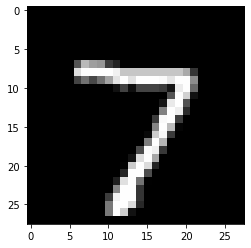

In [0]:
plt.imshow(test_1,cmap='gray')

In [0]:
y_pred = network.predict_classes(test_images)   # predict_classes() outputs the class with highest estimated probability
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import numpy as np

In [0]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
y_actual = np.argmax(test_labels,axis=1)

In [0]:
y_actual

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_actual,y_pred)

array([[ 963,    0,    1,    2,    0,    3,    7,    1,    3,    0],
       [   0, 1110,    1,    3,    1,    1,    4,    2,   13,    0],
       [  10,    4,  920,   17,   17,    0,    9,   16,   33,    6],
       [   2,    1,   19,  923,    1,   26,    2,   14,   13,    9],
       [   1,    1,    5,    1,  919,    0,   12,    2,    8,   33],
       [  11,    4,    5,   33,   10,  785,   12,    4,   21,    7],
       [  13,    3,    4,    1,   13,   12,  907,    1,    4,    0],
       [   3,   10,   27,    7,    8,    0,    0,  946,    3,   24],
       [   9,    6,    7,   18,    9,   20,   14,   11,  870,   10],
       [  13,    7,    2,   10,   41,    9,    1,   17,    4,  905]])

<p><h3><b><font color = 'DarkBlue'> Evaluate the model  </font></b></h3></p>

check the performance of model on test data.

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.2678 - accuracy: 0.9248


In [0]:
print('test_acc:', test_acc)
print('test_loss :', test_loss)

test_acc: 0.9248
test_loss : 0.2678280811727047
